In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from IPython import display

def aff2hom(P):
    return np.append(P, 1)

P1=np.array([1683, 623])
P2=np.array([945, 1344])
P3=np.array([422, 826])
P5=np.array([1797, 361])
P6=np.array([937, 1124])
P7=np.array([327, 566])
P8=np.array([1212, 69])

P1h=aff2hom(P1)
P2h=aff2hom(P2)
P3h=aff2hom(P3)
P5h=aff2hom(P5)
P6h=aff2hom(P6)
P7h=aff2hom(P7)
P8h=aff2hom(P8)

tacke=[]
tacke.append(P1h) #0
tacke.append(P2h) #1
tacke.append(P3h) #2
tacke.append(P5h) #3
tacke.append(P6h) #4
tacke.append(P7h) #5
tacke.append(P8h) #6

#Očitali smo koordinate temena i prebacili smo ih u homogene koordinate. Potom smo ih ubacili u listu "tacke".

def hom2aff(P):
    return P[:-1]/P[2]

def presek_pravih(A, B, C, D):
    return hom2aff(np.cross(np.cross(A, B), np.cross(C, D)))

def usrednjavanje(A, B, C):
    return np.divide(A+B+C, 3)

def osmoteme(tacke):
    PX1=presek_pravih(tacke[5], tacke[2], tacke[4], tacke[1])
    PX2=presek_pravih(tacke[4], tacke[1], tacke[3], tacke[0])
    PX3=presek_pravih(tacke[5], tacke[2], tacke[3], tacke[4])

    PY1=presek_pravih(tacke[1], tacke[0], tacke[4], tacke[3])
    PY2=presek_pravih(tacke[4], tacke[3], tacke[5], tacke[6])
    PY3=presek_pravih(tacke[1], tacke[2], tacke[4], tacke[6])

    PZ1=presek_pravih(tacke[1], tacke[2], tacke[4], tacke[5])
    PZ2=presek_pravih(tacke[4], tacke[5], tacke[3], tacke[6])
    PZ3=presek_pravih(tacke[1], tacke[2], tacke[3], tacke[6])
    
    #Odredili smo nedoglede vektorskim proizvodima pravih i prebacili homogene koordinate u afine.
    
    PX=usrednjavanje(PX1, PX2, PX3)
    PY=usrednjavanje(PY1, PY2, PY3)
    PZ=usrednjavanje(PZ1, PZ2, PZ3)
    
    #"Usrednjili" smo nedoglede. Sada računamo koordinate skrivenog temena.
    
    P41=presek_pravih(tacke[6], aff2hom(PX), tacke[0], aff2hom(PZ))
    P42=presek_pravih(tacke[6], aff2hom(PX), tacke[2], aff2hom(PY))
    P43=presek_pravih(tacke[0], aff2hom(PZ), tacke[2], aff2hom(PY))

    P4=usrednjavanje(P41, P42, P43)

    return np.round(P4)
    
P4r=osmoteme(tacke)
print(P4r)
    

[1191.  379.]


Odredili smo koordinate tačke P4. Sada ćemo je predstaviti na slici

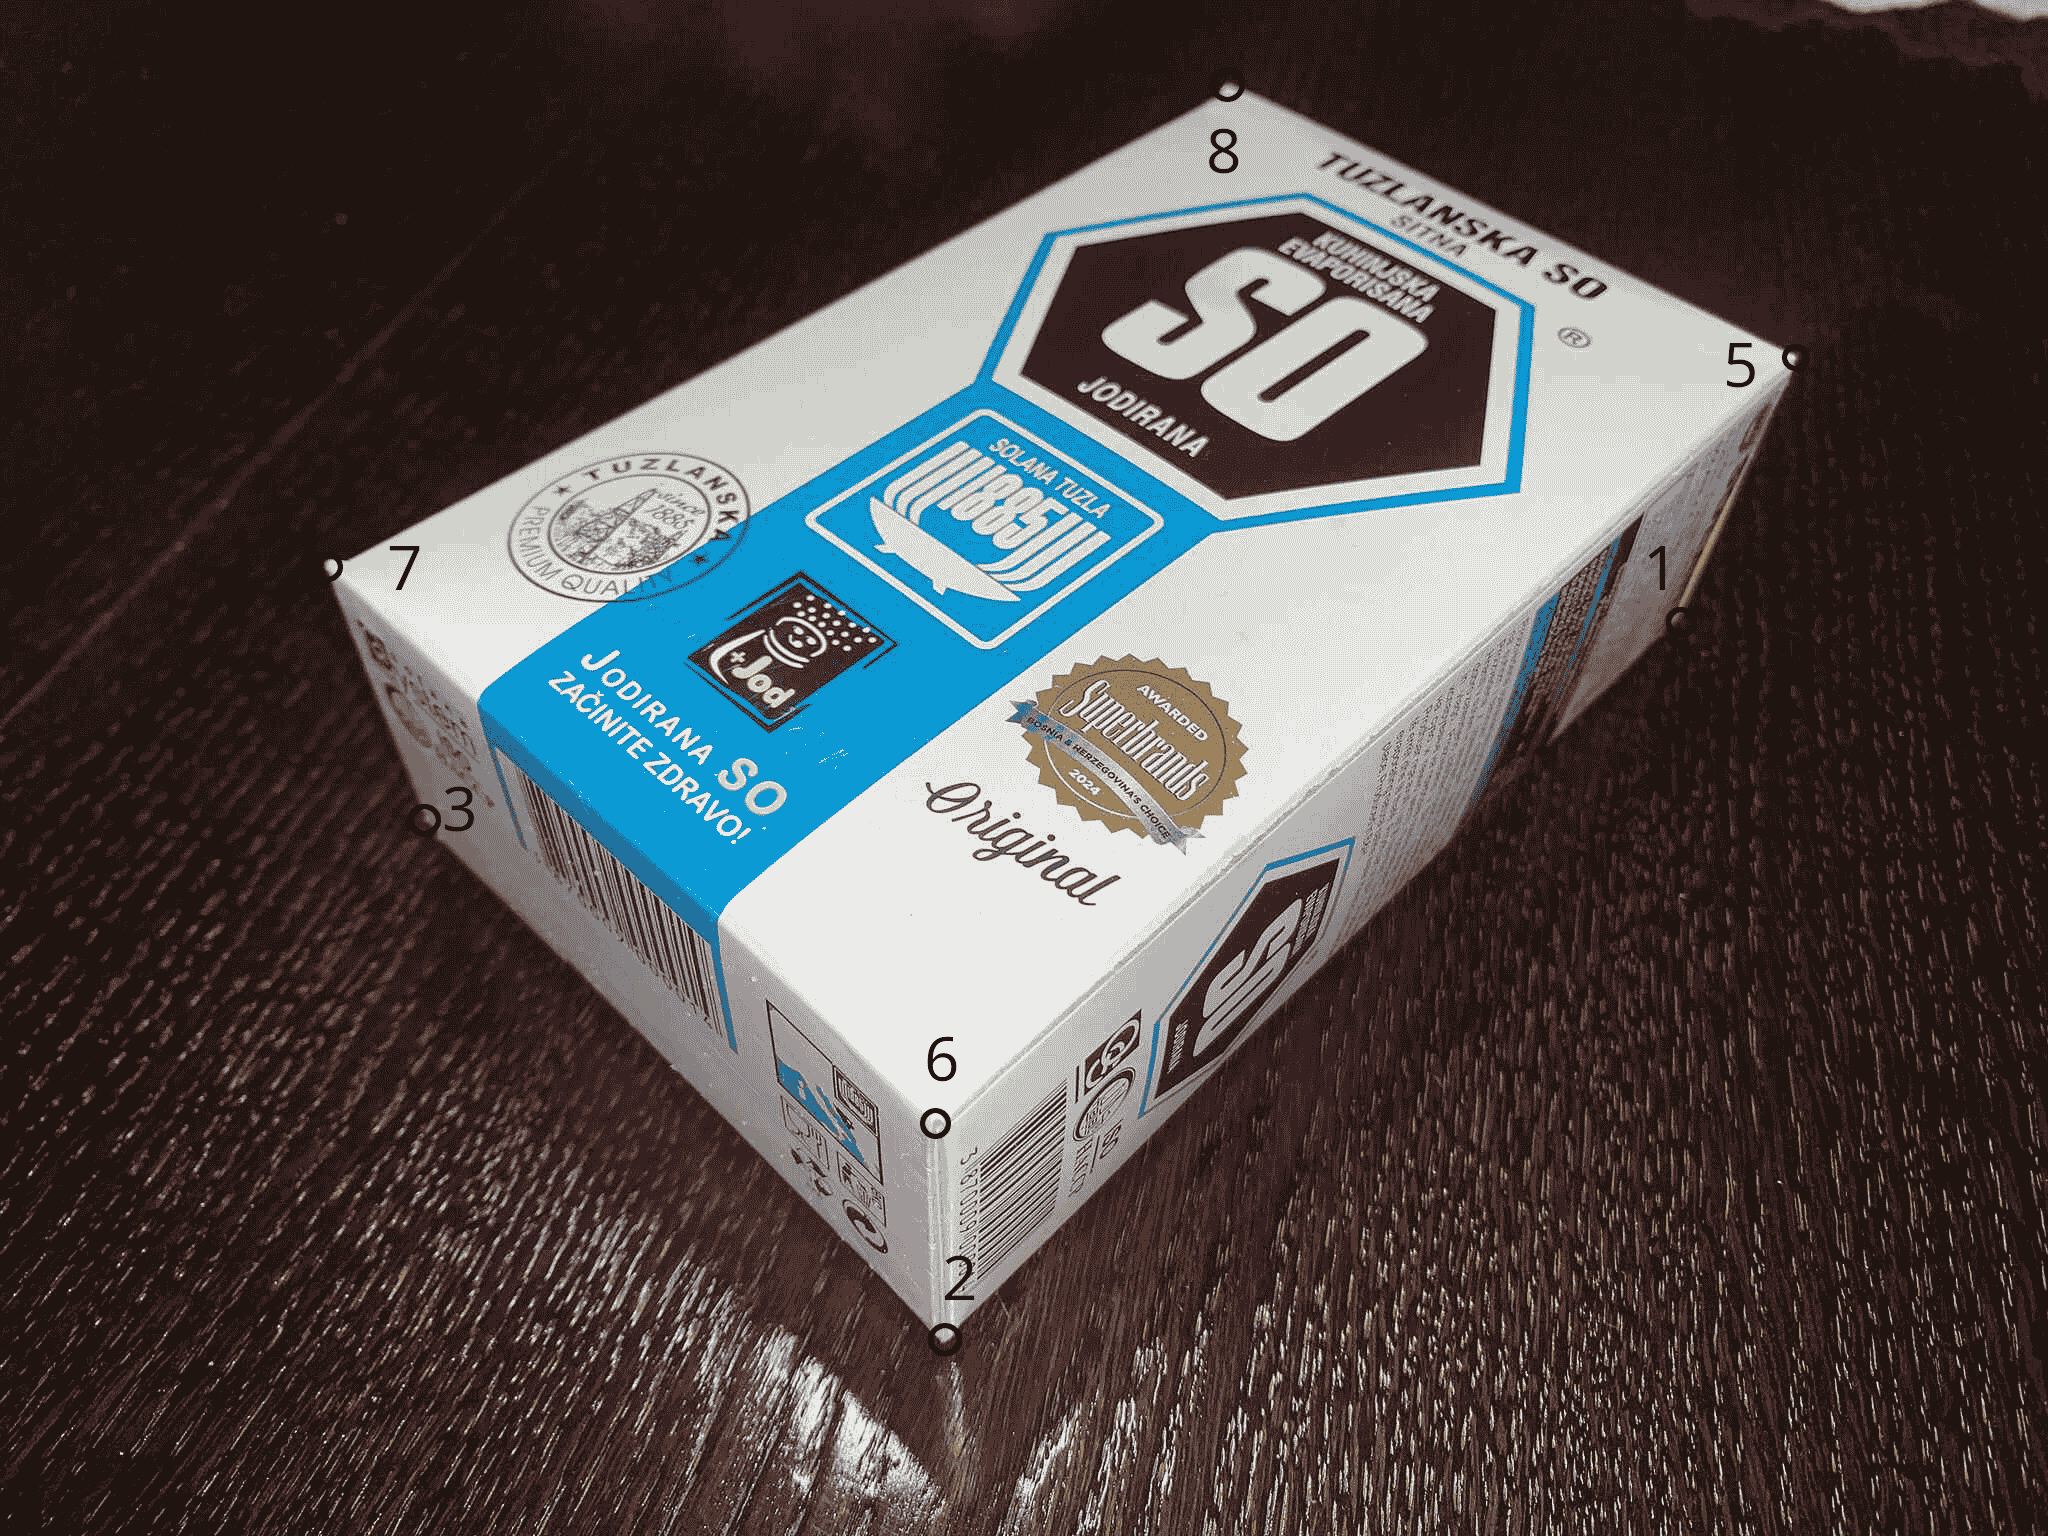

In [59]:
display.Image("/home/belja/Desktop/nevidljivo_teme.png")

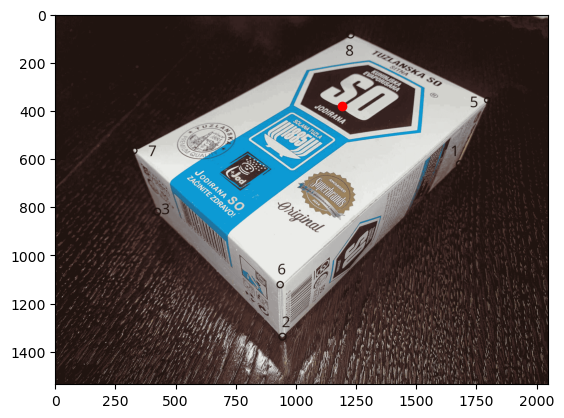

Koordinate nevidljivog temena: [1191.  379.]


In [60]:
plt.plot(P4r[0], P4r[1], 'ro')
data = image.imread('/home/belja/Desktop/nevidljivo_teme.png')
plt.imshow(data)
plt.show()
print('Koordinate nevidljivog temena:', P4r)